# S&P 500 Exploratory Data Analysis

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Reading the data 

In [3]:
clean = pd.read_excel('../data/cleaned_data.xlsx')
display(clean.head())

print(f"This dataset contains {clean.shape[0]} rows and {clean.shape[1]} columns.")

,Date,High,Open,Close,Low
0,1990-01-01,360.589996,353.399994,352.200012,351.350006
1,1990-01-08,354.239990,352.200012,339.929993,339.489990
2,1990-01-15,342.010010,339.929993,339.149994,333.369995
3,1990-01-22,339.959991,339.140015,325.799988,321.440002
4,1990-01-29,332.100006,325.799988,330.920013,319.829987


This dataset contains 1818 rows and 5 columns.


## Cleaned Data EDA

In [4]:
clean['Percentage Change'] = clean['Close'].pct_change() * 100
clean['Actual Change'] = clean['Close'].diff()
clean.head()

,Date,High,Open,Close,Low,Percentage Change,Actual Change
0,1990-01-01,360.589996,353.399994,352.200012,351.350006,NaN,NaN
1,1990-01-08,354.239990,352.200012,339.929993,339.489990,-3.483821,-12.270020
2,1990-01-15,342.010010,339.929993,339.149994,333.369995,-0.229459,-0.779999
3,1990-01-22,339.959991,339.140015,325.799988,321.440002,-3.936313,-13.350006
4,1990-01-29,332.100006,325.799988,330.920013,319.829987,1.571524,5.120026


> We have calculated the percentage change in the closing price as well as the actual change in price in dollars ($). The table above represents these changes, providing insights into the variations in the closing price over the specified period.

In [5]:
clean.isna().sum()

Date                 0
High                 0
Open                 0
Close                0
Low                  0
Percentage Change    1
Actual Change        1
dtype: int64

> We have identified null values in the dataset and found one null value in both Percentage Change and Actual Change. This is expected, as the first value lacks a predecessor for the calculation. That's why we decided to delete it

In [6]:
clean.dropna(how='any')

,Date,High,Open,Close,Low,Percentage Change,Actual Change
1,1990-01-08,354.239990,352.200012,339.929993,339.489990,-3.483821,-12.270020
2,1990-01-15,342.010010,339.929993,339.149994,333.369995,-0.229459,-0.779999
3,1990-01-22,339.959991,339.140015,325.799988,321.440002,-3.936313,-13.350006
4,1990-01-29,332.100006,325.799988,330.920013,319.829987,1.571524,5.120026
5,1990-02-05,336.089996,330.920013,333.619995,326.549988,0.815902,2.699982
...,...,...,...,...,...,...,...
1813,2024-09-30,5765.140137,5726.520020,5751.069824,5674.000000,0.224809,12.899902
1814,2024-10-07,5822.129883,5737.799805,5815.029785,5686.850098,1.112140,63.959961
1815,2024-10-14,5878.459961,5829.810059,5864.669922,5804.479980,0.853652,49.640137
1816,2024-10-21,5866.919922,5857.819824,5808.120117,5762.410156,-0.964245,-56.549805


##### The code below represents bins (groups). In total, there are 12 bins: 6 represent decreases, and 6 represent increases. Below table shows frequency of these bins

In [7]:
bins = [-float('inf'), -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3, float('inf')]
labels = [
    'Extreme Decrease',
    'Large Decrease',
    'Significant Decrease',
    'Moderate Decrease',
    'Small Decrease',
    'Minimal Decrease',

    'Minimal Increase',
    'Small Increase',
    'Moderate Increase',
    'Significant Increase',
    'Large Increase',
    'Extreme Increase',
]

clean['Percentage Change Bin'] = pd.cut(clean['Percentage Change'], bins=bins, labels=labels)

frequency_table = clean['Percentage Change Bin'].value_counts().sort_index()

frequency_percentage = (frequency_table / frequency_table.sum()) * 100

frequency_table_with_percentage = pd.DataFrame({
    'Frequency': frequency_table,
    'Percentage of Total': frequency_percentage
})
frequency_table_with_percentage

,Frequency,Percentage of Total
Percentage Change Bin,,
Extreme Decrease,119,6.549257
Large Decrease,124,6.824436
Significant Decrease,90,4.953220
Moderate Decrease,129,7.099615
Small Decrease,138,7.594937
Minimal Decrease,187,10.291690
Minimal Increase,197,10.842047
Small Increase,221,12.162906
Moderate Increase,182,10.016511


### Histogram of Percentage Changes in Closing Prices

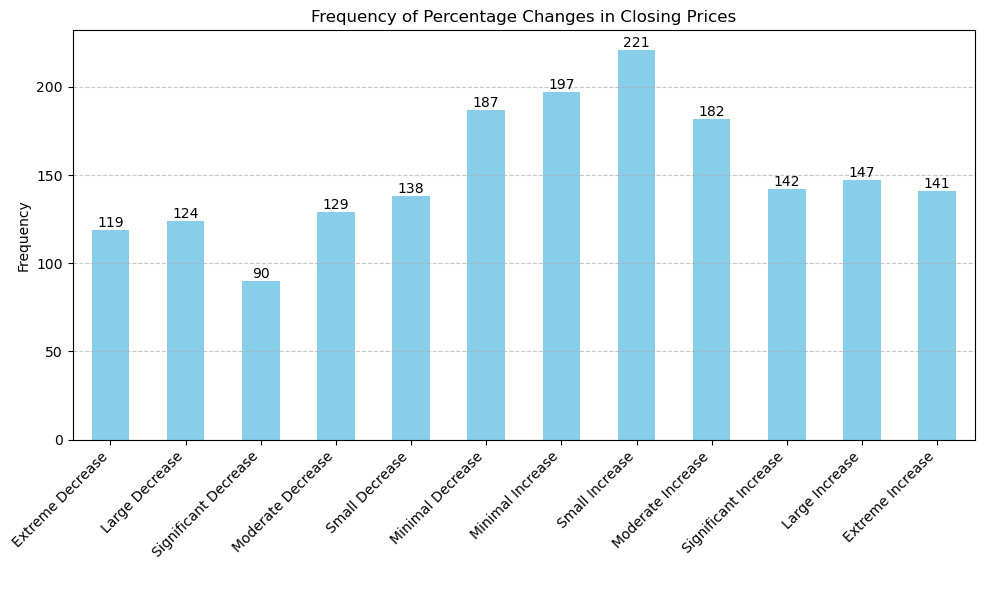

In [8]:
plt.figure(figsize=(10, 6))
bars = frequency_table.plot(kind='bar', color='skyblue', legend=False)
plt.title('Frequency of Percentage Changes in Closing Prices')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for bar in bars.containers[0]: 
    height = bar.get_height()  
    if height > 0: 
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{int(height)}', 
            ha='center',  
            va='bottom'  
        )
        
plt.show()

> The plot reveals the distribution of percentage changes in closing prices, with the highest frequency occurring in the **"Small Increase"** bin, which has a value of 221. This is closely followed by the **"Minimal Increase"** category at 197 and the **"Minimal Decrease"** category at 187. In contrast, the **"Significant Decrease"** category shows the lowest frequency, with only 90 occurrences.

> Overall, the data suggests that the majority of percentage changes in closing prices were positive, with a higher concentration of small to minimal increases compared to decreases. This indicates a general upward trend in the closing prices during the analyzed period.

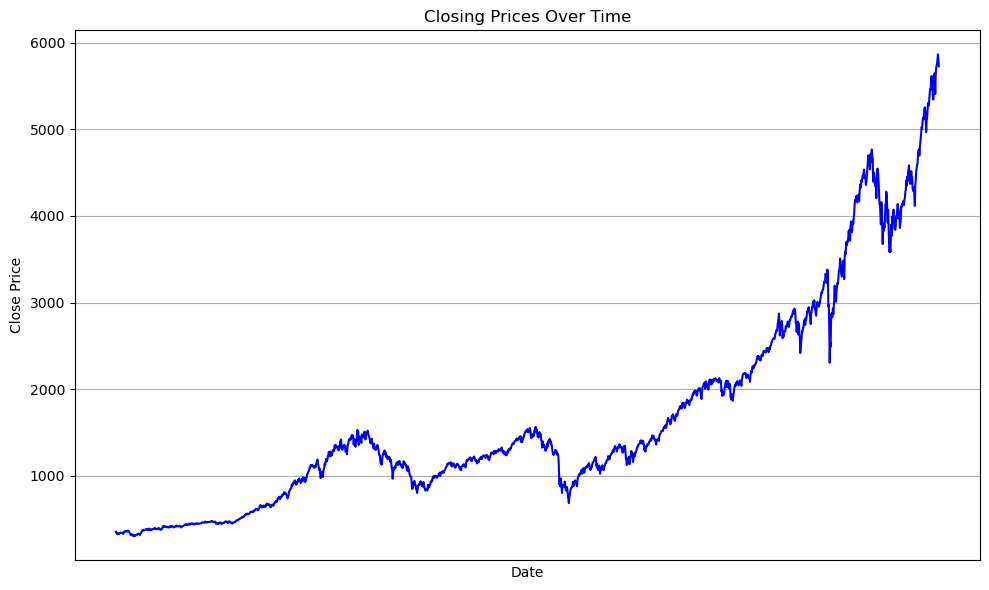

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(clean['Date'], clean['Close'], color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks([])
plt.tight_layout()
plt.show()


> The plot displays the closing prices over time, illustrating the fluctuations in the price of the asset throughout the given period. The line represents the trend of the closing prices, with noticeable peaks and valleys indicating periods of increase and decrease.

> Although the x-axis is not labeled with specific dates, the line clearly shows the overall trajectory of the closing prices, helping to identify trends, volatility, and any significant price movements during the observed timeframe. By analyzing the plot, one can assess periods of stability or heightened activity, which may be useful for further analysis of market behavior or asset performance.

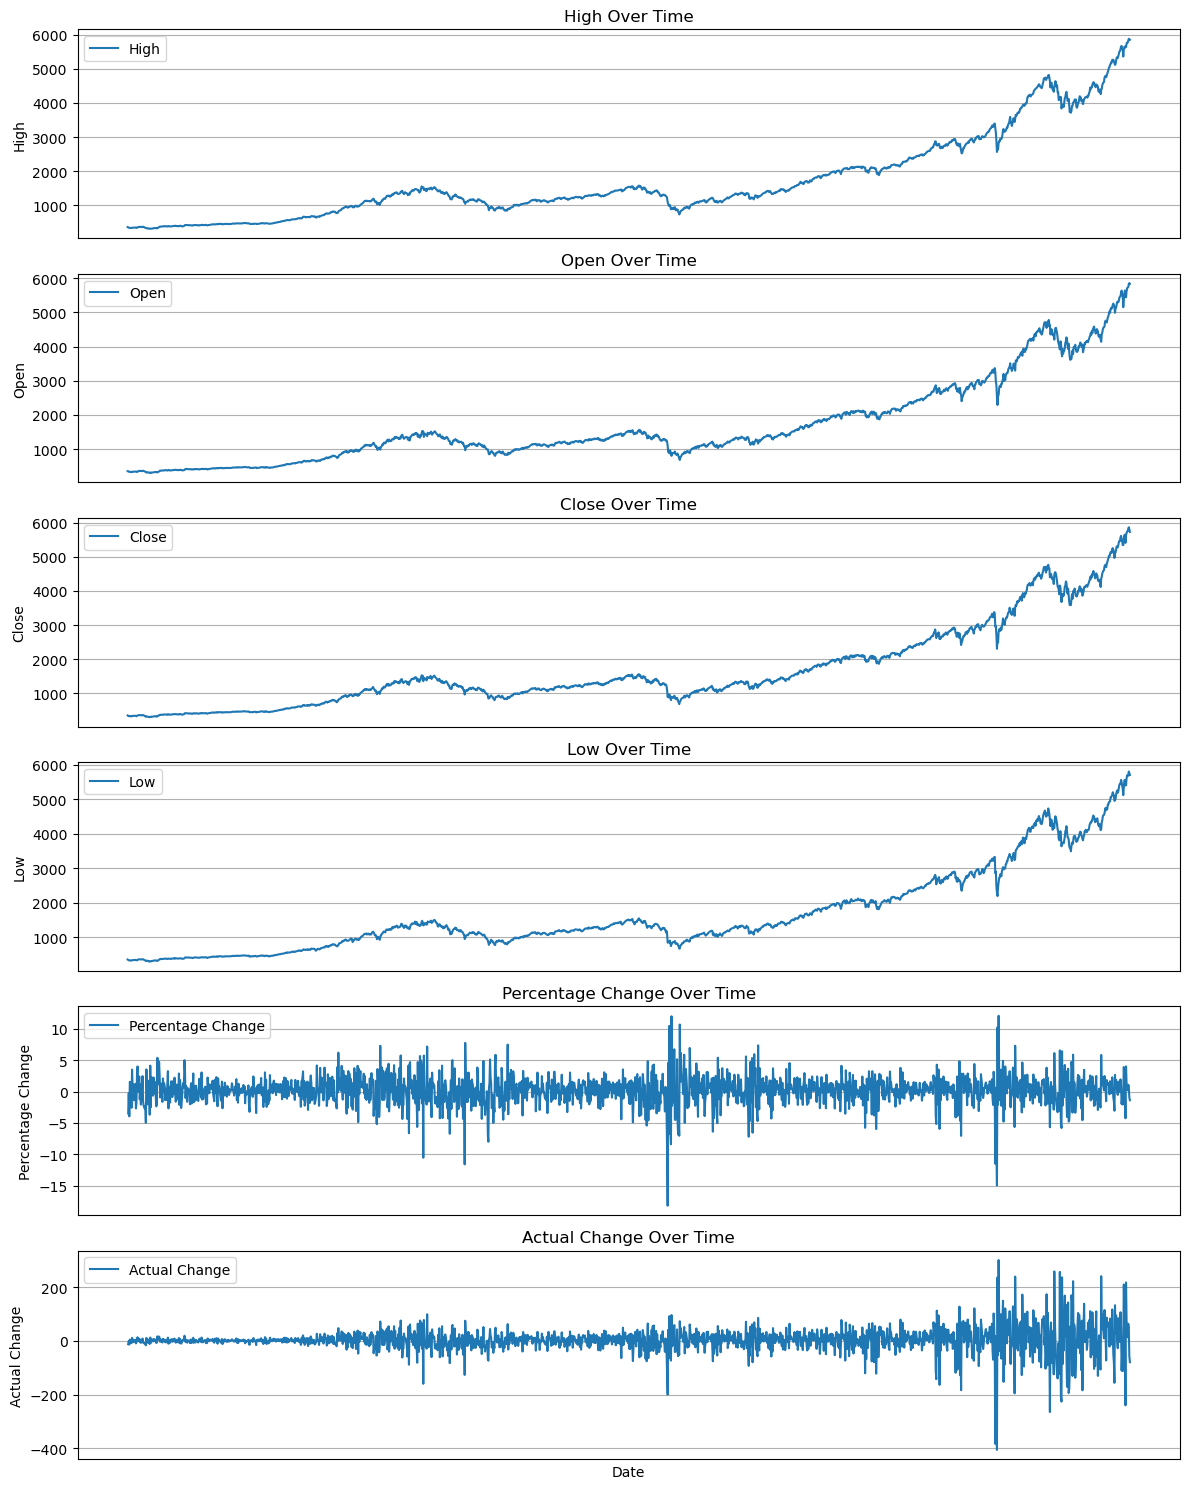

In [14]:
columns_to_plot = ['High', 'Open', 'Close', 'Low', 'Percentage Change', 'Actual Change']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 15), sharex=True)
for i, column in enumerate(columns_to_plot):
    axes[i].plot(clean['Date'], clean[column], label=column, color='tab:blue')
    axes[i].set_title(f'{column} Over Time')
    axes[i].set_ylabel(column)
    axes[i].grid(True)
    axes[i].legend()

plt.xlabel('Date')
plt.xticks([])
plt.tight_layout()

plt.show()


> **High, Open, Close, and Low:** These prices exhibit a consistent upward trend over the period, indicating steady market growth. However, periodic dips reflect market volatility.

> **Percentage Change:** This subplot highlights fluctuations in daily percentage changes, with both small increases and decreases being common. Occasional spikes suggest significant market events.

> **Actual Change:** Similar to the percentage change, actual price changes show larger deviations at certain points, reflecting volatile market periods.

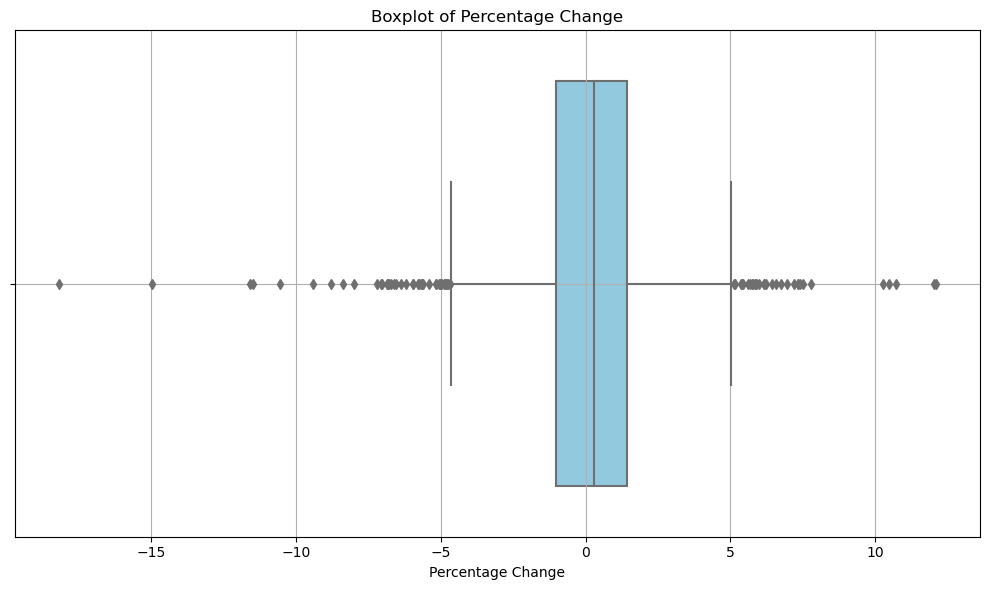

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean, x='Percentage Change', color='skyblue')
plt.title('Boxplot of Percentage Change')
plt.xlabel('Percentage Change')
plt.grid(True)
plt.tight_layout()
plt.show()

> The boxplot represents the distribution of percentage changes in the S&P 500 index.


- **Central Tendency:**

	•	The median percentage change (the line inside the box) is close to zero, indicating that most weekly changes in the S&P 500 are small or balanced around no significant change.
    

- **Spread and Variability:**

	•	The interquartile range (IQR), is relatively narrow, suggesting that the majority of weekly percentage changes are concentrated within a small range.
    
	•	This indicates low variability in most weekly movements.  

 
- **Outliers:**

	•	There are several outliers on both the negative and positive sides, which represent weeks with extreme percentage changes in the index.
    
	•	On the negative side, the outliers are more extreme (e.g., beyond -15%), potentially indicating market crashes or highly volatile events.
    
	•	On the positive side, outliers are less extreme, suggesting that significant upward movements are rarer compared to significant drops.